<a href="https://colab.research.google.com/github/SourabhThanvi/Pw_Skills_Sourabh/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Practical

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (
    make_blobs, make_moons, make_circles,
    load_iris, load_wine, load_breast_cancer, load_digits
)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

##  1. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.


In [2]:
X1, y1 = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
kmeans1 = KMeans(n_clusters=4, random_state=42)
y_kmeans1 = kmeans1.fit_predict(X1)

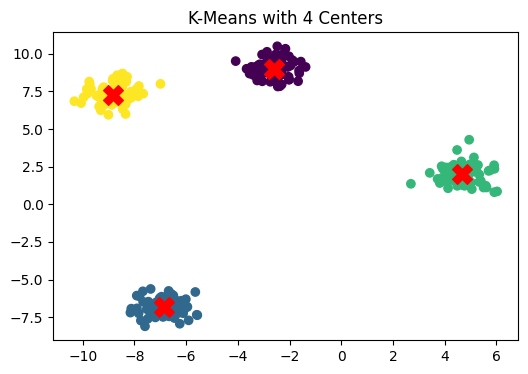

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans1, cmap='viridis')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means with 4 Centers")
plt.show()

##  2. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.


In [4]:
iris = load_iris()
X2 = iris.data
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X2)
print("First 10 predicted labels (Iris - Agglomerative Clustering):", labels_agg[:10])

First 10 predicted labels (Iris - Agglomerative Clustering): [1 1 1 1 1 1 1 1 1 1]


## 3. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.


In [5]:
X3, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
dbscan1 = DBSCAN(eps=0.2, min_samples=5)
labels_db1 = dbscan1.fit_predict(X3)

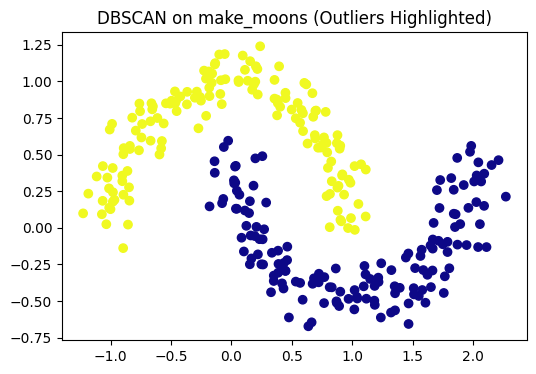

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(X3[:, 0], X3[:, 1], c=labels_db1, cmap='plasma')
plt.title("DBSCAN on make_moons (Outliers Highlighted)")
plt.show()

## 4. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.


In [7]:
wine = load_wine()
X4 = StandardScaler().fit_transform(wine.data)
kmeans2 = KMeans(n_clusters=3, random_state=42)
labels_wine = kmeans2.fit_predict(X4)
unique, counts = np.unique(labels_wine, return_counts=True)
print("Cluster sizes (Wine - KMeans):", dict(zip(unique, counts)))

Cluster sizes (Wine - KMeans): {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


## 5. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.


In [8]:
X5, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
labels_db2 = dbscan2.fit_predict(X5)

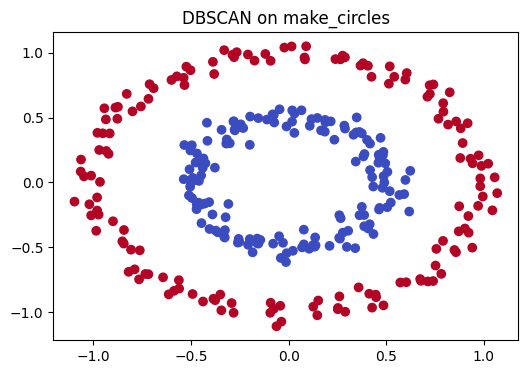

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(X5[:, 0], X5[:, 1], c=labels_db2, cmap='coolwarm')
plt.title("DBSCAN on make_circles")
plt.show()

## 6. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.


In [10]:
cancer = load_breast_cancer()
X6 = MinMaxScaler().fit_transform(cancer.data)
kmeans3 = KMeans(n_clusters=2, random_state=42)
kmeans3.fit(X6)
print("Cluster centroids (Breast Cancer - KMeans):\n", kmeans3.cluster_centers_)

Cluster centroids (Breast Cancer - KMeans):
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


## 7. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.

In [11]:
X7, _ = make_blobs(n_samples=300, centers=[[1, 1], [-1, -1], [1, -1]], cluster_std=[0.4, 0.2, 0.5], random_state=42)
dbscan3 = DBSCAN(eps=0.3, min_samples=5)
labels_db3 = dbscan3.fit_predict(X7)

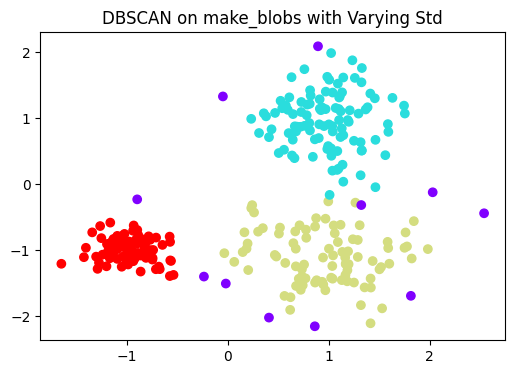

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(X7[:, 0], X7[:, 1], c=labels_db3, cmap='rainbow')
plt.title("DBSCAN on make_blobs with Varying Std")
plt.show()

## 8. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.


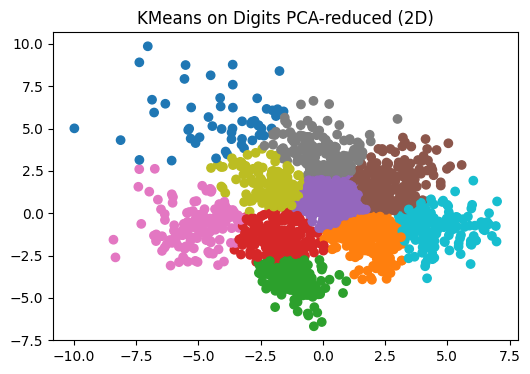

In [13]:
digits = load_digits()
X8 = StandardScaler().fit_transform(digits.data)
pca = PCA(n_components=2)
X8_reduced = pca.fit_transform(X8)
kmeans4 = KMeans(n_clusters=10, random_state=42)
labels_digits = kmeans4.fit_predict(X8_reduced)

plt.figure(figsize=(6, 4))
plt.scatter(X8_reduced[:, 0], X8_reduced[:, 1], c=labels_digits, cmap='tab10')
plt.title("KMeans on Digits PCA-reduced (2D)")
plt.show()

## 9. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.


In [14]:
X9, _ = make_blobs(n_samples=500, centers=4, random_state=42)
scores = []
ks = range(2, 6)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X9)
    score = silhouette_score(X9, labels)
    scores.append(score)

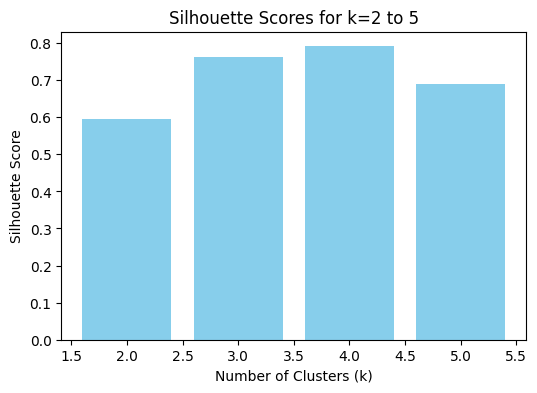

In [15]:
plt.figure(figsize=(6, 4))
plt.bar(ks, scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k=2 to 5")
plt.show()

## 10. Hierarchical clustering on Iris dataset with dendrogram (average linkage)


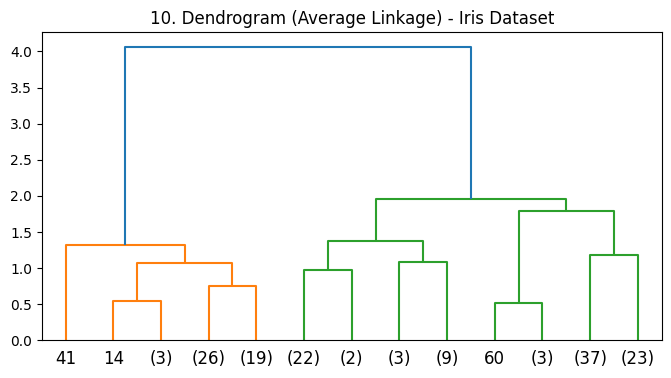

In [16]:
linkage_matrix = linkage(X2, method='average')
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title("10. Dendrogram (Average Linkage) - Iris Dataset")
plt.show()

## 11. Overlapping clusters: KMeans + Decision Boundaries

In [17]:
X11, y11 = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)
kmeans11 = KMeans(n_clusters=3, random_state=42).fit(X11)
h = 0.02
x_min, x_max = X11[:, 0].min() - 1, X11[:, 0].max() + 1
y_min, y_max = X11[:, 1].min() - 1, X11[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans11.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

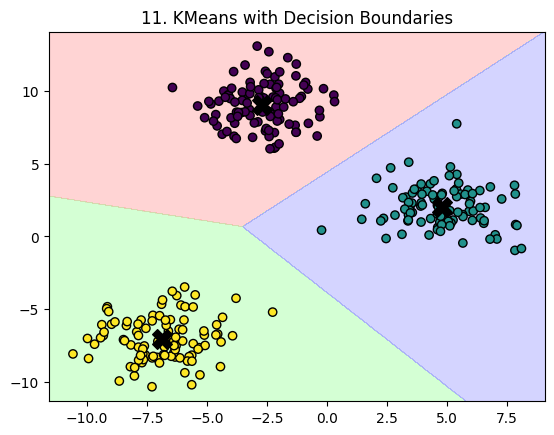

In [18]:
plt.figure()
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.5)
plt.scatter(X11[:, 0], X11[:, 1], c=y11, edgecolor='k')
plt.scatter(kmeans11.cluster_centers_[:, 0], kmeans11.cluster_centers_[:, 1], marker='X', s=200, c='black')
plt.title("11. KMeans with Decision Boundaries")
plt.show()

## 12. DBSCAN on Digits with t-SNE

In [19]:
X12 = TSNE(n_components=2, random_state=42).fit_transform(X8)
dbscan12 = DBSCAN(eps=2.5, min_samples=5)
labels12 = dbscan12.fit_predict(X12)

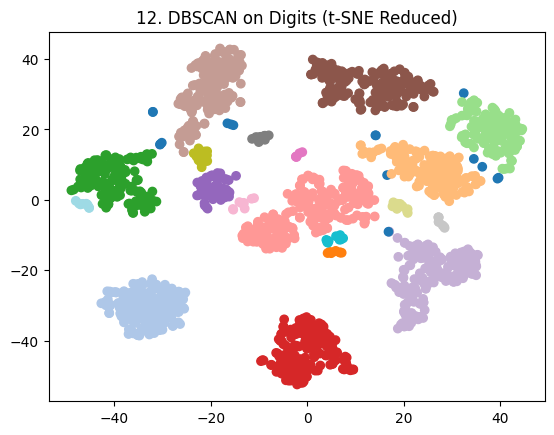

In [20]:
plt.figure()
plt.scatter(X12[:, 0], X12[:, 1], c=labels12, cmap='tab20')
plt.title("12. DBSCAN on Digits (t-SNE Reduced)")
plt.show()

## 13. Agglomerative Clustering (complete linkage) on blobs

In [21]:
X13, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
agg13 = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels13 = agg13.fit_predict(X13)

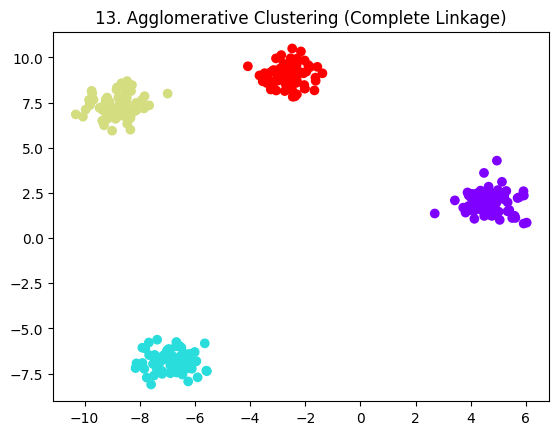

In [22]:
plt.figure()
plt.scatter(X13[:, 0], X13[:, 1], c=labels13, cmap='rainbow')
plt.title("13. Agglomerative Clustering (Complete Linkage)")
plt.show()

## 14. Compare inertia values for K = 2 to 6 using K-Means (Breast Cancer)

In [23]:
X14 = StandardScaler().fit_transform(cancer.data)
ks = range(2, 7)
inertias = [KMeans(n_clusters=k, random_state=42).fit(X14).inertia_ for k in ks]

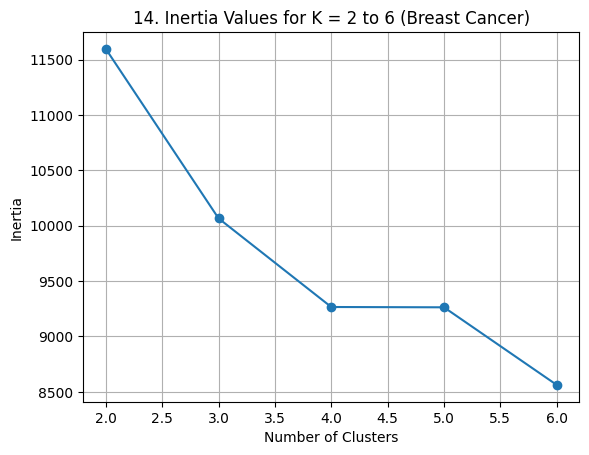

In [24]:

plt.figure()
plt.plot(ks, inertias, marker='o')
plt.title("14. Inertia Values for K = 2 to 6 (Breast Cancer)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## 15. Agglomerative Clustering (single linkage) on concentric circles


In [25]:
X15, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
agg15 = AgglomerativeClustering(n_clusters=2, linkage='single')
labels15 = agg15.fit_predict(X15)

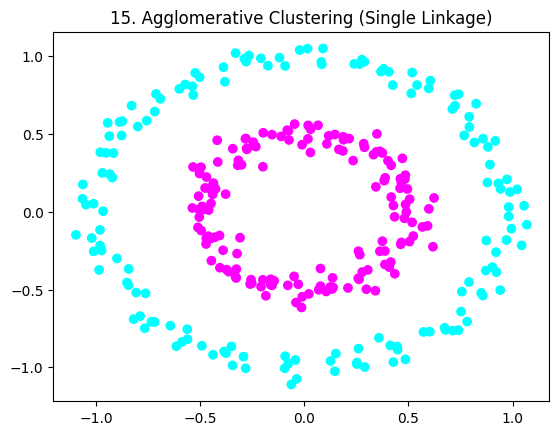

In [26]:
plt.figure()
plt.scatter(X15[:, 0], X15[:, 1], c=labels15, cmap='cool')
plt.title("15. Agglomerative Clustering (Single Linkage)")
plt.show()

## 16. DBSCAN on Wine dataset (scaled) and count number of clusters


In [27]:
X16 = StandardScaler().fit_transform(wine.data)
dbscan16 = DBSCAN(eps=1.3, min_samples=5)
labels16 = dbscan16.fit_predict(X16)
n_clusters_16 = len(set(labels16)) - (1 if -1 in labels16 else 0)
print("16. Number of clusters (excluding noise) in Wine data:", n_clusters_16)

16. Number of clusters (excluding noise) in Wine data: 0


## 17. KMeans on synthetic blobs and plot cluster centers


In [28]:
X17, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans17 = KMeans(n_clusters=3, random_state=42).fit(X17)
labels17 = kmeans17.predict(X17)

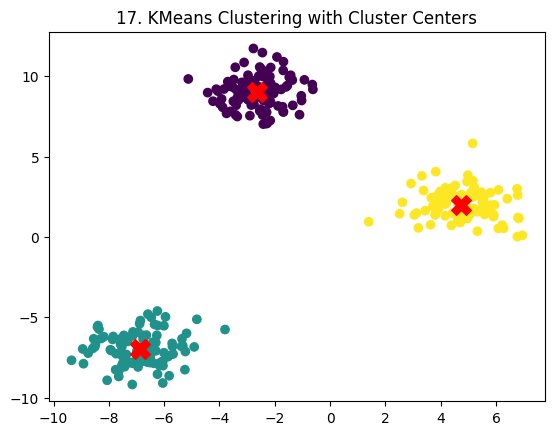

In [29]:
plt.figure()
plt.scatter(X17[:, 0], X17[:, 1], c=labels17, cmap='viridis')
plt.scatter(kmeans17.cluster_centers_[:, 0], kmeans17.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title("17. KMeans Clustering with Cluster Centers")
plt.show()

## 18. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise


In [30]:
iris = load_iris()
X18 = StandardScaler().fit_transform(iris.data)
dbscan18 = DBSCAN(eps=0.6, min_samples=5)
labels18 = dbscan18.fit_predict(X18)
noise_count = np.sum(labels18 == -1)
print("18. Number of noise points in Iris dataset (DBSCAN):", noise_count)

18. Number of noise points in Iris dataset (DBSCAN): 26


## 19. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result


In [31]:
X19, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans19 = KMeans(n_clusters=2, random_state=42)
labels19 = kmeans19.fit_predict(X19)

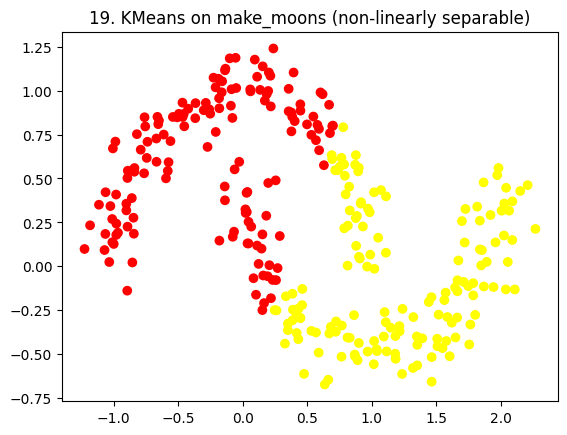

In [32]:
plt.figure()
plt.scatter(X19[:, 0], X19[:, 1], c=labels19, cmap='autumn')
plt.title("19. KMeans on make_moons (non-linearly separable)")
plt.show()

## 20. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot


In [33]:
digits = load_digits()
X20 = StandardScaler().fit_transform(digits.data)
pca20 = PCA(n_components=3)
X20_reduced = pca20.fit_transform(X20)
kmeans20 = KMeans(n_clusters=10, random_state=42)
labels20 = kmeans20.fit_predict(X20_reduced)

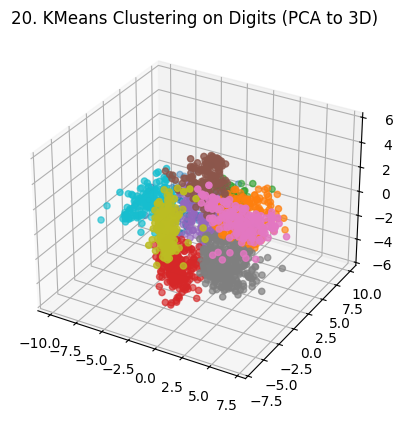

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X20_reduced[:, 0], X20_reduced[:, 1], X20_reduced[:, 2], c=labels20, cmap='tab10')
ax.set_title("20. KMeans Clustering on Digits (PCA to 3D)")
plt.show()

## 21. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering


In [36]:
X21, _ = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans21 = KMeans(n_clusters=5, random_state=42)
labels21 = kmeans21.fit_predict(X21)
sil_score21 = silhouette_score(X21, labels21)
print("21. Silhouette Score (5 clusters):", sil_score21)

21. Silhouette Score (5 clusters): 0.678738720085253


## 22. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D


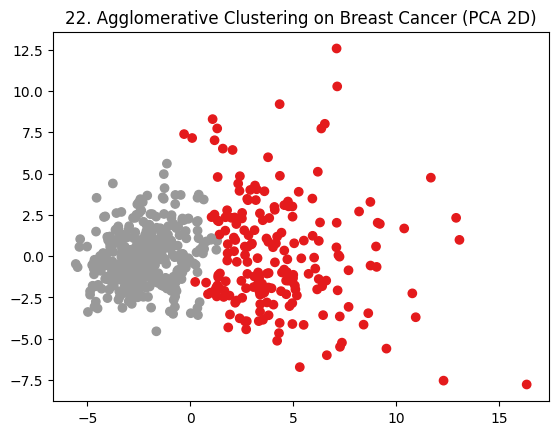

In [37]:
X22 = load_breast_cancer().data
X22_scaled = StandardScaler().fit_transform(X22)
X22_pca = PCA(n_components=2).fit_transform(X22_scaled)
agg22 = AgglomerativeClustering(n_clusters=2)
labels22 = agg22.fit_predict(X22_pca)
plt.figure()
plt.scatter(X22_pca[:, 0], X22_pca[:, 1], c=labels22, cmap='Set1')
plt.title("22. Agglomerative Clustering on Breast Cancer (PCA 2D)")
plt.show()

## 23. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side


In [38]:
X23, _ = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=0)
kmeans23 = KMeans(n_clusters=2, random_state=42).fit_predict(X23)
dbscan23 = DBSCAN(eps=0.2, min_samples=5).fit_predict(X23)


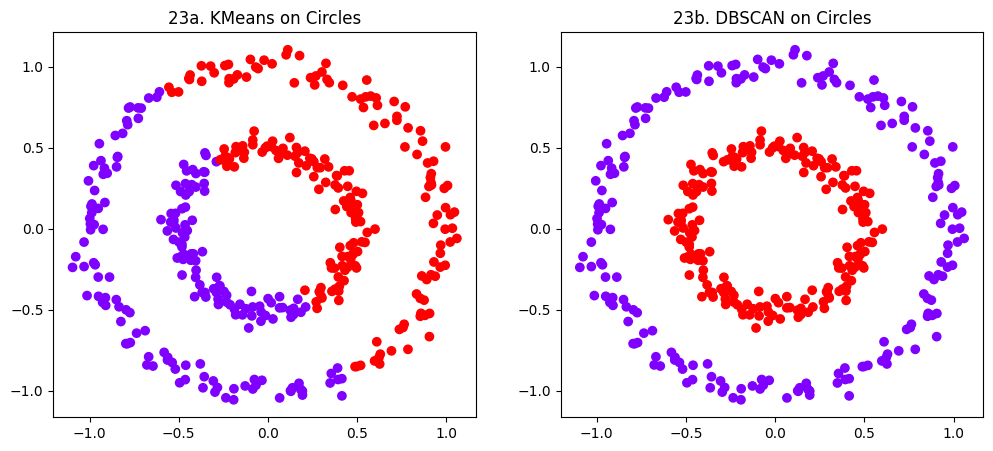

In [39]:

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X23[:, 0], X23[:, 1], c=kmeans23, cmap='rainbow')
axs[0].set_title("23a. KMeans on Circles")
axs[1].scatter(X23[:, 0], X23[:, 1], c=dbscan23, cmap='rainbow')
axs[1].set_title("23b. DBSCAN on Circles")
plt.show()

## 24. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering


In [40]:
X24 = load_iris().data
X24_scaled = StandardScaler().fit_transform(X24)
kmeans24 = KMeans(n_clusters=3, random_state=42)
labels24 = kmeans24.fit_predict(X24_scaled)
sil_samples24 = silhouette_samples(X24_scaled, labels24)

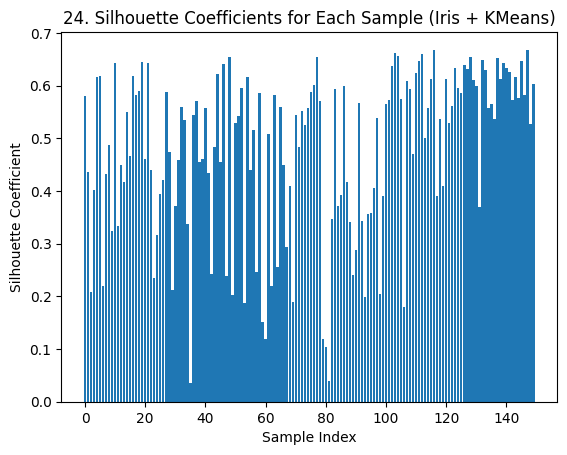

In [41]:
plt.figure()
plt.bar(range(len(sil_samples24)), sil_samples24)
plt.title("24. Silhouette Coefficients for Each Sample (Iris + KMeans)")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.show()

## 25. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters


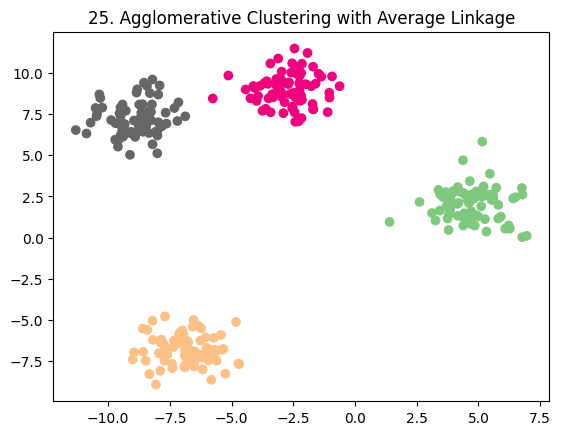

In [42]:
X25, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg25 = AgglomerativeClustering(n_clusters=4, linkage='average')
labels25 = agg25.fit_predict(X25)
plt.figure()
plt.scatter(X25[:, 0], X25[:, 1], c=labels25, cmap='Accent')
plt.title("25. Agglomerative Clustering with Average Linkage")
plt.show()

## 26. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)


In [44]:
import pandas as pd

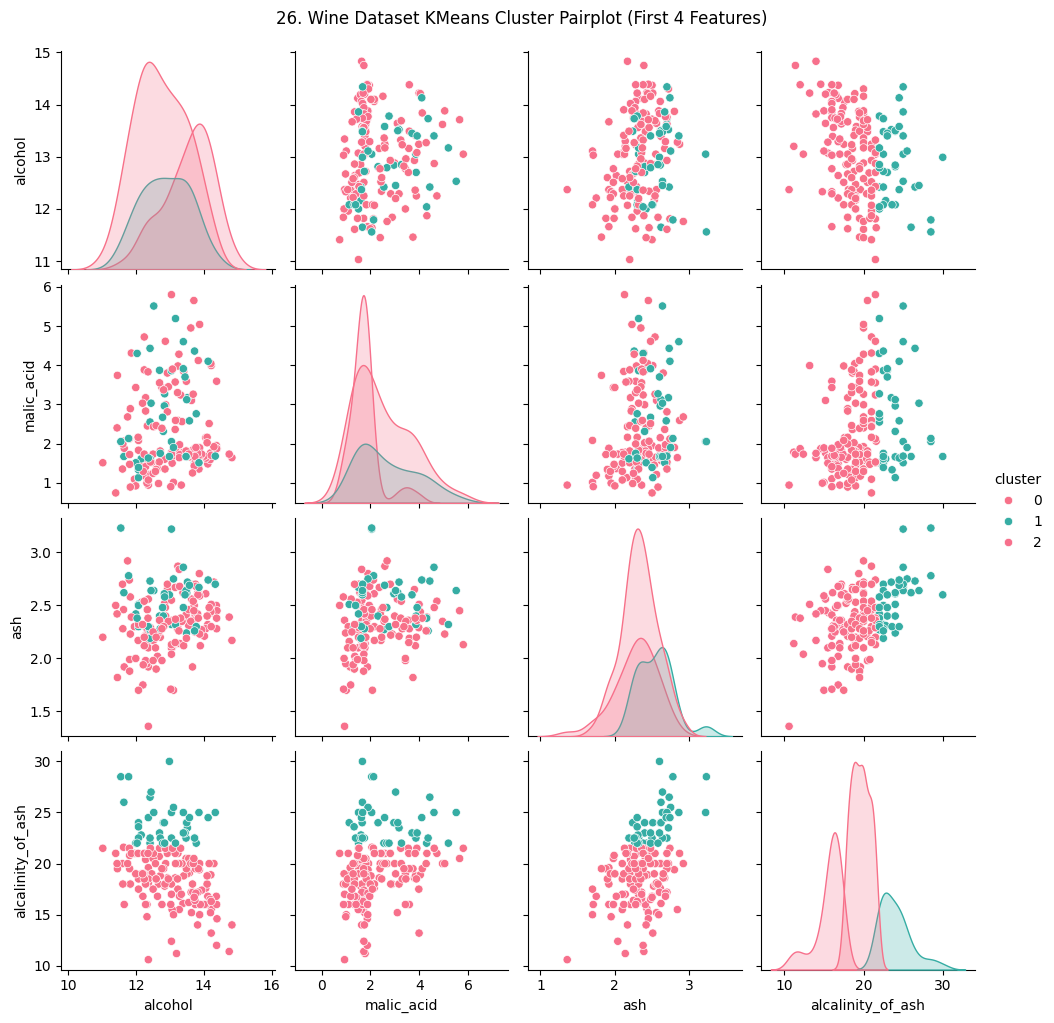

In [45]:
wine26 = load_wine()
X26 = pd.DataFrame(wine26.data[:, :4], columns=wine26.feature_names[:4])
kmeans26 = KMeans(n_clusters=3, random_state=42)
X26['cluster'] = kmeans26.fit_predict(X26)
sns.pairplot(X26, hue='cluster', palette='husl')
plt.suptitle("26. Wine Dataset KMeans Cluster Pairplot (First 4 Features)", y=1.02)
plt.show()

## 27. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count


In [46]:
X27, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)
dbscan27 = DBSCAN(eps=0.9, min_samples=5)
labels27 = dbscan27.fit_predict(X27)
noise_count27 = np.sum(labels27 == -1)
print("27. DBSCAN Noise Points:", noise_count27)

27. DBSCAN Noise Points: 35


## 28. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters


In [47]:
X28 = load_digits().data
X28_scaled = StandardScaler().fit_transform(X28)
tsne28 = TSNE(n_components=2, random_state=42)
X28_reduced = tsne28.fit_transform(X28_scaled)
agg28 = AgglomerativeClustering(n_clusters=10)
labels28 = agg28.fit_predict(X28_reduced)

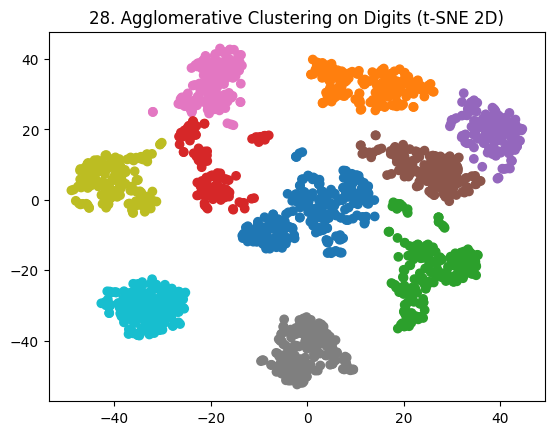

In [48]:
plt.figure()
plt.scatter(X28_reduced[:, 0], X28_reduced[:, 1], c=labels28, cmap='tab10')
plt.title("28. Agglomerative Clustering on Digits (t-SNE 2D)")
plt.show()

# Clustering Theoritical Questions

## 1.What is unsupervised learning in the context of machine learning
## Ans. Unsupervised learning refers to algorithms that learn patterns from data without labeled outputs. It groups or organizes data based on similarity of each datapoints.



---



## 2.How does K-Means clustering algorithm work
## Ans. K-Means partitions data into k clusters by minimizing intra-cluster variance. It iteratively assigns points to the nearest centroid and updates the centroids.


---


## 3.Explain the concept of a dendrogram in hierarchical clustering
## Ans. A dendrogram is a tree-like diagram showing the hierarchical relationships between clusters, illustrating the merging or splitting of clusters at various distances


---


## 4.What is the main difference between K-Means and Hierarchical Clustering?
## Ans. K-Means is a partitioning method requiring the number of clusters upfront, while Hierarchical Clustering builds a nested structure and doesn’t need the cluster count in advance.


---


## 5.What are the advantages of DBSCAN over K-Means?
## Ans. DBSCAN can find arbitrarily shaped clusters and handles noise, unlike K-Means which assumes spherical clusters and struggles with outliers.


---



## 6.When would you use Silhouette Score in clustering?
## Ans. Silhouette Score evaluates how well each point fits within its cluster versus others, helping determine the optimal number of clusters or clustering quality.


---



## 7.  What are the limitations of Hierarchical Clustering?
## Ans. It's computationally expensive on large datasets and sensitive to noise and outliers. Once a merge/split is done, it can’t be undone.



---



## 8. Why is feature scaling important in clustering algorithms like K-Means?
## Ans. Clustering depends on distance metrics. Without scaling, features with larger ranges dominate, leading to biased clustering.


---


## 9.  How does DBSCAN identify noise points?
## Ans. DBSCAN labels points as noise if they don’t have enough neighboring points (less than min_samples) within a given radius.


---


## 10.  Define inertia in the context of K-Means?
## ans. Inertia is the sum of squared distances between each data point and its assigned cluster center—used to measure compactness.


---


## 11. What is the elbow method in K-Means clustering?
## Ans. The elbow method plots inertia versus k and identifies the “elbow point” where adding more clusters yields diminishing returns.


---


## 12.  Describe the concept of "density" in DBSCAN?
## Ans. Density is defined by the number of points within a radius (eps) of a core point. High-density areas form clusters.


---


## 13. Can hierarchical clustering be used on categorical data?
## Ans. Yes, but it requires a proper distance metric for categorical data like Hamming distance or using one-hot encoding.


---


## 14. What does a negative Silhouette Score indicate?
## Ans. A negative score means the point may be assigned to the wrong cluster, as it’s closer to a different cluster than its own.


---


## 15. Explain the term "linkage criteria" in hierarchical clustering?
## Ans. Linkage criteria determine how distances between clusters are computed (e.g., single, complete, average) when merging.


---


## 16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
## Ans. K-Means assumes equal-sized, spherical clusters, so it may incorrectly assign points when clusters have unequal sizes or densities.


---


## 17. What are the core parameters in DBSCAN, and how do they influence clustering?
## Ans. eps defines the neighborhood radius and min_samples is the minimum number of points to form a dense region. These control cluster formation and noise sensitivity.


---


## 19. What is agglomerative clustering?
## Ans. It’s a bottom-up approach where each data point starts as a single cluster and pairs of clusters are merged iteratively based on a linkage criterion.


---


## 20. What makes Silhouette Score a better metric than just inertia for model evaluation?
## Ans. Silhouette Score considers both cohesion and separation, giving a more holistic view of clustering quality, while inertia only measures internal compactness.